# Gyro Measurements

In the previous lesson you implemented techniques to accurately estimate a state given noisy measurements. This turns out to be incredibly useful as all sensors produce errors during measuring.

Consider calculating the angular velocity solely using gyroscope measurements. Each measurement has some noise associated with it which we'll define as a Gaussian. The estimated angular velocity can expressed as:

$
\tilde{\omega}= \omega +b + \eta
$

Where $\omega$ is the true value of the angular velocity, $b$ is a bias term associated to the gyroscope, and $\eta = G(0,\sigma)$ the Gaussian error with 0 mean introduced by the measurement process. （注：传感器的高斯噪声均值为零。）Change of accumulated uncertainty over time can be described as:（注：理解重要公式。）
$$
\sigma_{t}^2 = \sigma_{t-1}^2 + \sigma^2 dt^2
$$

where $\sigma_t$ is the accumulated uncertainty and $\sigma$ is the measurement uncertainty. 

TODO:

 * Develop a function `measure_turn_rate` which takes the real omega, the bias, and the standard deviation and will return the simulated measured angular velocity. （注：旨在认为制造带噪声的传感器）
 
 * Develop a function `calculate_attitude` which is responsible for advancing the angle measurement based on the measured angular velocity by $dt$. 

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import jdc
from gyro_test import TestCode

pylab.rcParams['figure.figsize'] = 10, 10

In [2]:
def measure_turn_rate(omega,          # The true value of the omega
                      bias,           # Value of the bias term
                      sigma_omega     # Sigma value associated with the measurement  
                     ):
    '''
    The measurement of the angular velocity can be modeled as the sum of the real value, 
    bias term and the 0 mean Gaussian distribution associated with the measuring process.
    '''
    # TODO: Return the modeled measured value of the angular velocity.
    
    return omega + bias + np.random.normal(0.0, sigma_omega)

def calculate_attitude(true_angle,                # The true value of the angular velocity
                       measured_angle,            # Previously estimated angle by integration 
                       accumulated_sigma,         # Accumulated effective sigma due to integration 
                       omega,                     # The true omega
                       measured_omega,            # Measured omega 
                       sigma_omega,               # The uncertainty of each measurement
                       dt):                       # The time interval between measurements 
    '''
    Advance the true angle, measured angle and accumulated sigma values based on the true omega, 
    measured omega, and sigma value for the angular velocity measurement Gaussian.

    '''
    # TODO: Assign the proper values to the given variables 
    true_angle = true_angle + omega * dt
    measured_angle =  measured_angle + measured_omega * dt
    accumulated_sigma =  np.sqrt(accumulated_sigma ** 2 + (sigma_omega * dt) ** 2)
    
    return true_angle, measured_angle, accumulated_sigma

Testing the `calculate_attitude` function

In [3]:
TestCode.test_the_calculate_attitude(calculate_attitude)

True angle is correct. 
Measured angle calculation is correct. 
Accumulated sigma calculation is correct.


### Setup



In [4]:
omega = 0.2              # The true angular velocity [rad/sec]
total_time = 10          # Total time of the measurements [sec]
dt= 0.01                 # Time intervale between measurements [sec]
sigma_omega = 0.1        # The sigma value for the Gaussian distribution associated with the measurement 
bias = -0.01             # The bias of the measurement unit 

# An array of time value for each measurement 
t = np.linspace(0.0,total_time,int(total_time/dt))

# Initial values of the true turn angle, measured angle is initialized at 0 as well as 
# the initial value of the accumulated sigma.
true_angle, measured_angle, accumulated_sigma = 0.0, 0.0, 0.0

# Initializing the arrays for historical values for each variable 
true_angle_history = np.array([true_angle]) 
measured_angle_history = np.array([true_angle])  
accumulated_sigma_history = np.array([accumulated_sigma])  
measured_omega_history= np.array([omega])

We will measure the angular velocity for each time step and generate the array of the historical data of the measured omegas, true angle, estimated angle by integration, the accumulated sigma due to multiple integrations. 

In [5]:
for i in range(1, t.shape[0]):
    # Simulating the angular velocity measurement 
    measured_omega = measure_turn_rate(omega,bias, sigma_omega)
    
    # Advancing the true turn angle, measured angle, and the accumulated sigma
    # in time by new measurement values. 
    true_angle, measured_angle, accumulated_sigma = calculate_attitude(true_angle,
                                                                       measured_angle,
                                                                       accumulated_sigma,
                                                                       omega, 
                                                                       measured_omega,
                                                                       sigma_omega,
                                                                       dt)
    
    # Adding the returned values to the historical array
    measured_omega_history = np.vstack((measured_omega_history, measured_omega))
    true_angle_history = np.vstack((true_angle_history, true_angle))
    measured_angle_history = np.vstack((measured_angle_history, measured_angle))
    accumulated_sigma_history = np.vstack((accumulated_sigma_history, accumulated_sigma))

Plotting the actual object angle with the estimated angle and imposing the $\pm 3\sigma$ boundaries relative to the true values.     
(注：这里的$\sigma$不是传感器本身的$\sigma$，而是 measurement 过程累积的$\sigma_{t}$)

As time progresses the estimated angle strays further away from the ground truth due to accumulated noise. This shows, unfortunately, we **cannot rely solely on sensors.**

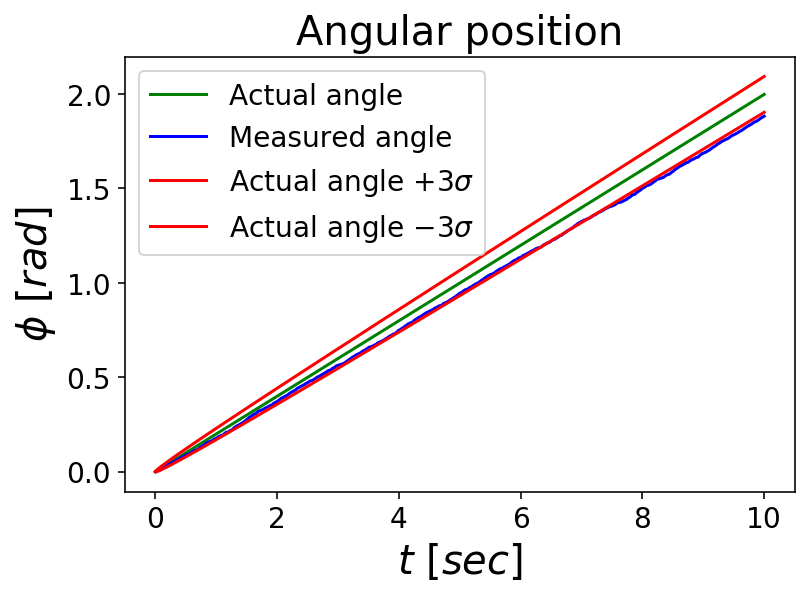

In [6]:
plt.plot(t, true_angle_history, color='green')
plt.plot(t, measured_angle_history, color='blue')
plt.plot(t, true_angle_history+3*accumulated_sigma_history, color='red')
plt.plot(t, true_angle_history-3*accumulated_sigma_history, color='red')
plt.title('Angular position').set_fontsize(20)
plt.ylabel('$\phi$ [$rad$]').set_fontsize(20)
plt.xlabel('$t$ [$sec$]').set_fontsize(20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(['Actual angle','Measured angle','Actual angle $+ 3 \sigma$','Actual angle $- 3 \sigma$'],fontsize = 14)
plt.show()

[Solution](./Gyroscope_Measurements-Solution.ipynb)